<a href="https://colab.research.google.com/github/cglansford/CryptoAppFYP/blob/main/CoinPricePrediction/coin_price_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from venv import create
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate('/firebase-sdk.json')

In [35]:
!pip install yfinance


In [34]:
import yfinance as yf
import pandas as pd
from fbprophet import Prophet


In [37]:
def make_prediction(ticker, periods, hist='3y'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    > ticker
        - ticker of stock to forecast
    > periods
        - number of days into the future to forecast (1) 
    > hist
       - number of years into past to collect data from (3)
    """
    # get data from yahoo finance
    coin_data = yf.Ticker(ticker)

    hist_data = coin_data.history(hist, auto_adjust=True)

    df = pd.DataFrame()

    #dates and closing values 
    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    model = Prophet(daily_seasonality=False)
    model.fit(df)

    future = model.make_future_dataframe(periods, freq='D')

    forecast = model.predict(future)

    model.plot(forecast)

    return forecast

update_time {
  seconds: 1649153740
  nanos: 816141000
}

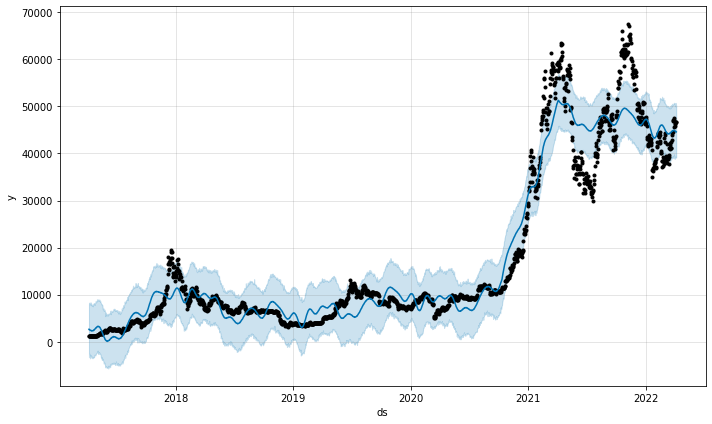

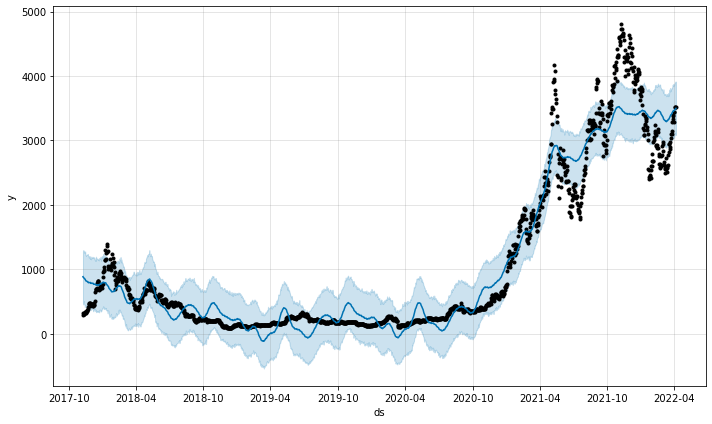

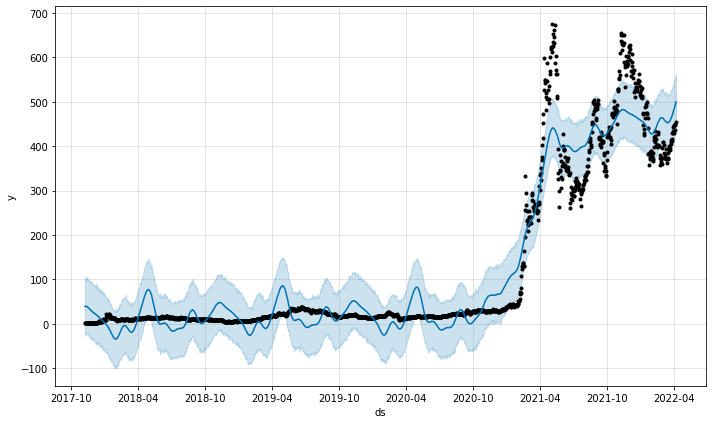

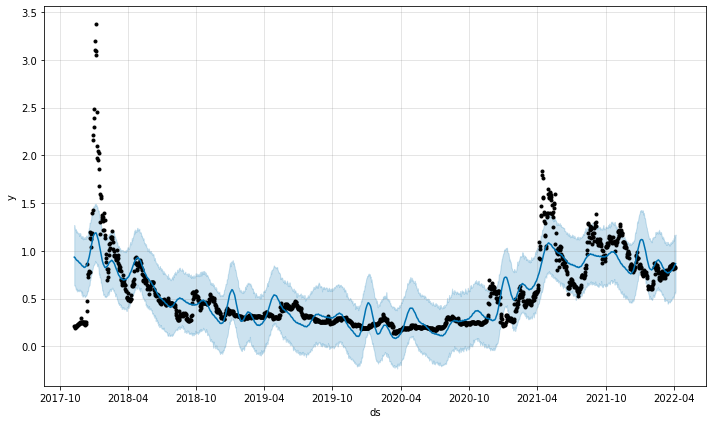

In [62]:
btc_forcast = make_prediction('BTC-USD', 1)
btc_forcast = btc_forcast[['trend', 'yhat_lower', 'yhat_upper']].tail(1)

eth_forcast = make_prediction('ETH-USD', 1)
eth_forcast = eth_forcast[['trend', 'yhat_lower', 'yhat_upper']].tail(1)

bnb_forcast = make_prediction('BNB-USD', 1)
bnb_forcast = bnb_forcast[['trend', 'yhat_lower', 'yhat_upper']].tail(1)

xrp_forcast = make_prediction('XRP-USD', 1)
xrp_forcast = xrp_forcast[['trend', 'yhat_lower', 'yhat_upper']].tail(1)

db = firestore.client()

doc_ref = db.collection('predictions').document('cryptos')
doc_ref.set({
    "cryptos":[
        {'name':'Bitcoin',
        'Prediction': btc_forcast.iat[0,0],
         'Upper Band': btc_forcast.iat[0,2],
         'Lower Band': btc_forcast.iat[0,1]},
         {'name':'Ethereum',
        'Prediction': eth_forcast.iat[0,0],
         'Upper Band': eth_forcast.iat[0,2],
         'Lower Band': eth_forcast.iat[0,1]},
        {'name':'BNB',
        'Prediction': bnb_forcast.iat[0,0],
         'Upper Band': bnb_forcast.iat[0,2],
         'Lower Band': bnb_forcast.iat[0,1]},
         {'name':'XRP',
        'Prediction': xrp_forcast.iat[0,0],
         'Upper Band': xrp_forcast.iat[0,2],
         'Lower Band': xrp_forcast.iat[0,1]}
        ] 
        
   
})

In [58]:


firebase_admin.initialize_app(cred)



AttributeError: ignored